In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
np.random.seed(42)
samples = 1000

total_steps = samples + 10  # plus 10 is defined for preserving from index error
y = np.zeros(total_steps)
u = np.zeros(total_steps)

In [3]:
# init condition tarif kardam motabegh soal
y[0] = 0
y[1] = 0

In [4]:
#input sin
t_ = np.arange(total_steps)
u = np.sin(2 * np.pi * t_/250)
u

array([0.        , 0.0251301 , 0.05024432, ..., 0.17502306, 0.19970998,
       0.22427076])

In [5]:
data_ = []
t = 2 # soal gofte az t = 2 ta t = 999 tekrar konim
count = 0

In [6]:
while count < samples:
    # formule sys motabegh soal y(t) = y(t-1)/(1+y(t-2)) + u(t-1)^3
    denom = 1 + y[t - 2]

    # makhraj nabayad sefr bashe
    if abs(denom) < 1e-7:
        denom = 1e-7

    num = y[t-1]
    p1 = num / denom
    p2 =  u[t-1]**3
    y[t] = p1 + p2


    # dataset ro ijad mikonam inja
    data_rows = {
        'Y[t-1]': y[t-1],
        'Y[t-2]': y[t-2],
        'U[t-1]': u[t-1],
        'Y[t]': y[t]
    }

    data_.append(data_rows)
    count += 1
    t += 1


In [8]:
df = pd.DataFrame(data_)
df.head()

,Y[t-1],Y[t-2],U[t-1],Y[t]
0,0.000000,0.000000,0.025130,0.000016
1,0.000016,0.000000,0.050244,0.000143
2,0.000143,0.000016,0.075327,0.000570
3,0.000570,0.000143,0.100362,0.001581
4,0.001581,0.000570,0.125333,0.003549


In [9]:
df.to_csv('1000Sample_data_ball&beam.csv', index=False)


## alan data ro darim


In [10]:
data = pd.read_csv('1000Sample_data_ball&beam.csv')
df = data
X = data[["Y[t-1]", "Y[t-2]", "U[t-1]"]]
Y = data[["Y[t]"]]

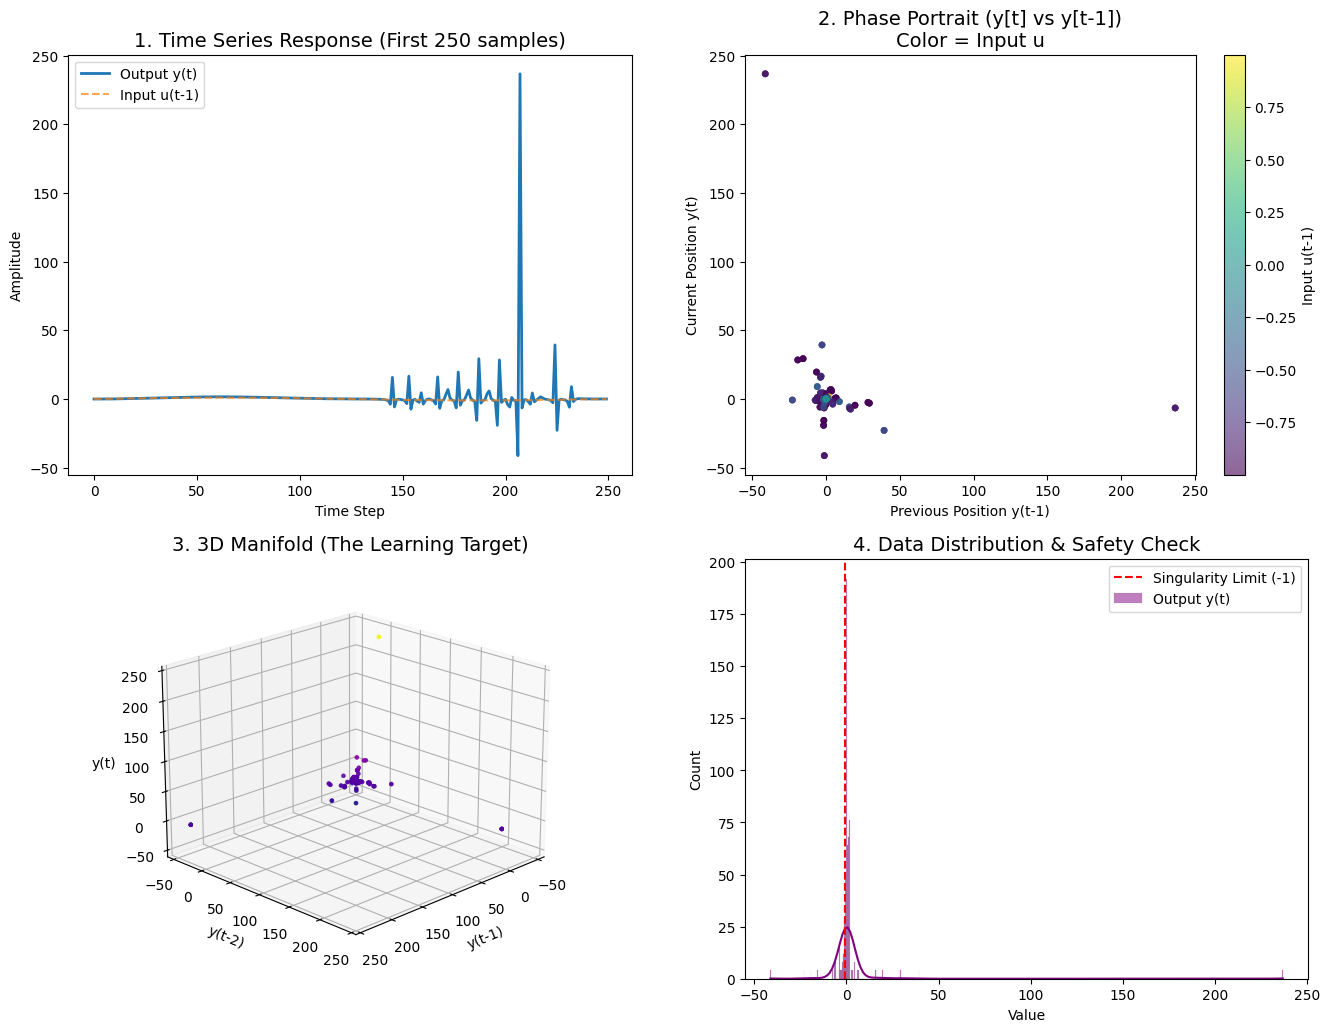

In [ ]:
# yekam plot mikonam data haro baresinkonam
plt.figure(figsize=(16, 12))

#raftar zamani ro negah konim ba ye bakhshi az data
# mikham bebinam aya out nesbat be input vakoneshi dare?
ax1 = plt.subplot(2 , 2 , 1)
subset = df.iloc[:250]
ax1.plot(subset.index, subset['Y[t]'], label='Output y(t)', color='#1f77b4', linewidth=2)
ax1.plot(subset.index, subset['U[t-1]'], label='Input u(t-1)', color='#ff7f0e', linestyle='--', alpha=0.7)
ax1.set_title('1. Time Series Response (First 250 samples)', fontsize=14)
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Amplitude')
ax1.legend()



#phas ro barresi konam. rabete recurrent y(t) va y(t-1)
ax2 = plt.subplot(2, 2, 2)
sc = ax2.scatter(df['Y[t-1]'], df['Y[t]'], c=df['U[t-1]'], cmap='viridis', alpha=0.6, s=15)
ax2.set_title('2. Phase Portrait (y[t] vs y[t-1])\nColor = Input u', fontsize=14)
ax2.set_xlabel('Previous Position y(t-1)')
ax2.set_ylabel('Current Position y(t)')
plt.colorbar(sc, ax=ax2, label='Input u(t-1)')


#barresi 3d data
ax3 = plt.subplot(2, 2, 3, projection='3d')
p3d = ax3.scatter(df['Y[t-1]'], df['Y[t-2]'], df['Y[t]'], c=df['Y[t]'], cmap='plasma', s=5)
ax3.set_title('3. 3D Manifold (The Learning Target)', fontsize=14)
ax3.set_xlabel('y(t-1)')
ax3.set_ylabel('y(t-2)')
ax3.set_zlabel('y(t)')
ax3.view_init(elev=20, azim=45)


# statistical distribution data ro check konam
ax4 = plt.subplot(2, 2, 4)
sns.histplot(df['Y[t]'], kde=True, color='purple', ax=ax4, label='Output y(t)')
# خط قرمز برای نشان دادن ناحیه تکینگی (Singularity) در فرمول
ax4.axvline(-1, color='red', linestyle='--', label='Singularity Limit (-1)')
ax4.set_title('4. Data Distribution & Safety Check', fontsize=14)
ax4.set_xlabel('Value')
ax4.legend()

نمودار اول :

در ۱۴۰ گام اول، مقدار $y$ بین $-0.5$ تا $+0.5$ نوسان می‌کند. این منطقه "امن" است (دور از $-1$).

در حوالی گام ۱۴۰، احتمالا به دلیل جمع شدن اثر ورودی‌ها، مقدار $y$ کمی پایین‌تر می‌رود و به مثلاً $-0.8$ یا $-0.9$ می‌رسد.

ناگهان اثر "مخرج کوچک" فعال می‌شود. سیستم یک لگد محکم می‌خورد و $y$ به عدد مثبت ۳۰ پرتاب می‌شود.

چون سیستم دینامیک است (به گذشته وابسته است)، این عدد بزرگ ۳۰ در گام بعدی وارد معادله می‌شود و سیستم را کاملاً بی‌ثبات می‌کند (نوسانات شدید مثبت و منفی پی‌درپی).


نمودار دوم و سوم:

هسته مرکزی: آن توده بنفش تیره، رفتار "سالم" سیستم است. جایی که توپ به آرامی حرکت می‌کند.

نقاط دوردست (Outliers): آن نقاط زرد و سبز که خیلی دور افتاده‌اند، همان لحظات انفجار هستند.


نمودار چهارم:

داده‌های بنفش رنگ از خط قرمز عبور کرده‌اند.

این یعنی توپ فرضی ما در این شبیه‌سازی، از نقطه فیزیکی غیرممکن عبور کرده است. در واقعیت فیزیکی، شاید این به معنای برخورد توپ با انتهای میله یا شکستن مکانیزم باشد.

سیستم    بارها و بارها به نقطه تکینگی (Singularity) برخورد کرده است.

Singularity یا تکینگی به نقطه‌ای گفته می‌شود که در آن، یک تابع یا معادله رفتار "خوش‌تعریف" خود را از دست می‌دهد؛ یعنی مقدارش به سمت بی‌نهایت می‌رود یا اصلاً قابل محاسبه نیست.


In [11]:
# data hamon ro motabegh khaste soal split kardam

from sklearn.model_selection import train_test_split
X = data[["Y[t-1]", "Y[t-2]", "U[t-1]"]].values
Y = data[["Y[t]"]].values

X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=42,
    shuffle=False
)

print(f"{X_train.shape}")
print(f"{X_test.shape}")

(700, 3)
(300, 3)


In [12]:
#  data ro normalize mikonam mikonam if needed

min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)

range_val = max_val - min_val
range_val[range_val == 0] = 1

def normalize(data, min_v, range_v):
    scaled_0_1 = (data - min_v) / range_v
    scaled_neg1_pos1 = (scaled_0_1 * 2) - 1
    return scaled_neg1_pos1

X_train = normalize(X_train, min_val, range_val)

X_test = normalize(X_test, min_val, range_val)


y_min = np.min(y_train)
y_max = np.max(y_train)
y_range = y_max - y_min

def normalize_y(data, min_v, range_v):
    return (data - min_v) / range_v

y_train = normalize_y(y_train, y_min, y_range)
y_test = normalize_y(y_test, y_min, y_range)

# define rbf

In [13]:
def rbf_kernel (x, mu, sigma):
    euclidean_distances = np.sum((x - mu) ** 2 )
    return np.exp(-euclidean_distances / (sigma ** 2))

In [14]:
x_test = np.array([1, 1])
mu_test = np.array([1, 1])
sigma = 1.0

result = rbf_kernel(x_test, mu_test, sigma)
result

np.float64(1.0)

khoroji manteghi dige neuron max tahrik ro dare e^0 = 1

In [15]:
def phi_matrix (x , centers, sigma):
    n = x.shape[0] #x = n*3
    k = centers.shape[0] #k = k*3
    phi = np.zeros((n,k))

    for i in range(n):
        for j in range(k):
            phi[i, j] = rbf_kernel(x[i], centers[j], sigma)

    return phi


In [16]:
def rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return np.sqrt(mse)


In [17]:
def sigma_(centers):
    k = centers.shape[0]
    if k <= 1:
        return 1

    total_distance = 0
    count = 0

    for i in range(k):
        for j in range(i+1, k):
            dist = np.sqrt(np.sum((centers[i] - centers[j])**2))
            total_distance += dist
            count += 1

    average_distance = total_distance / count
    return average_distance

In [ ]:
k = 200
np.random.seed(42)
random_indices = np.random.choice(len(X_train), k , replace=False)
centers = X_train[random_indices]
centers

array([[-7.14129195e-01, -7.05281882e-01, -7.54310938e-01],
       [-7.03236951e-01, -7.03229743e-01,  2.51320798e-02],
       [-5.89974590e-01, -7.30869581e-01, -5.25216099e-01],
       [-7.56497659e-01, -5.83980448e-01, -7.02705452e-01],
       [-6.92386048e-01, -6.92261782e-01,  9.71708455e-01],
       [-7.16282874e-01, -7.06760174e-01, -8.01630278e-01],
       [-7.17054334e-01, -6.38448299e-01, -3.68153621e-01],
       [-6.95561440e-01, -6.95836263e-01,  8.44394595e-01],
       [-6.92983878e-01, -6.93171277e-01,  9.58597476e-01],
       [-7.00703360e-01, -7.00493042e-01,  4.37150282e-01],
       [-6.53952898e-01, -6.79681623e-01, -9.43064996e-01],
       [-6.93614124e-01, -6.93404409e-01,  9.15313442e-01],
       [-7.21063014e-01, -4.98745637e-01, -9.51131614e-01],
       [-6.93614124e-01, -6.93404409e-01,  9.15313442e-01],
       [-6.99084215e-01, -6.98828761e-01,  5.87831665e-01],
       [-6.92261782e-01, -6.92151827e-01,  9.77345291e-01],
       [-7.15353919e-01, -7.10001791e-01

In [ ]:
sigma = sigma_(centers)
sigma

np.float64(0.8328547470143473)

In [ ]:
phi_train = phi_matrix(X_train, centers, sigma)
phi_train

array([[0.41643706, 0.99999986, 0.63362214, ..., 0.5530614 , 0.33677008,
        0.34659468],
       [0.39322435, 0.99909084, 0.60831228, ..., 0.57881015, 0.35831273,
        0.36845745],
       [0.37065895, 0.99637332, 0.58298433, ..., 0.60462421, 0.38051216,
        0.39095864],
       ...,
       [0.91597307, 0.23636468, 0.69012244, ..., 0.02091587, 0.00663176,
        0.00705494],
       [0.85748546, 0.22697192, 0.74053719, ..., 0.02040121, 0.00651462,
        0.00692766],
       [0.88921723, 0.2381707 , 0.69490902, ..., 0.02173352, 0.00698442,
        0.0074247 ]])

In [ ]:
# NumPy Linear Algebra Pseudo-Inverse = (phi_transpose * phi)^-1 * phi_transpose
# calculate weights by  lls and using psuedo inverse
alpha = np.linalg.pinv(phi_train).dot(y_train)
alpha.shape

(200, 1)

In [ ]:
phi_train.shape

(700, 200)

In [ ]:
alpha[:5].flatten()

array([-4.68938808e+09, -1.32425203e+10,  2.80602817e+07, -3.10812202e+07,
       -4.38930542e+09])

# test

In [ ]:
y_pred_train = phi_train.dot(alpha)

phi_test = phi_matrix(X_test, centers, sigma)
y_pred_test = phi_test.dot(alpha)



In [ ]:
rmse_train = rmse(y_train, y_pred_train)
rmse_test = rmse(y_test, y_pred_test)

print(f"Result for Train: {rmse_train}")
print(f"Result for Test: {rmse_test}")

Result for Train: 0.011833206150038801
Result for Test: 0.015397151728820144


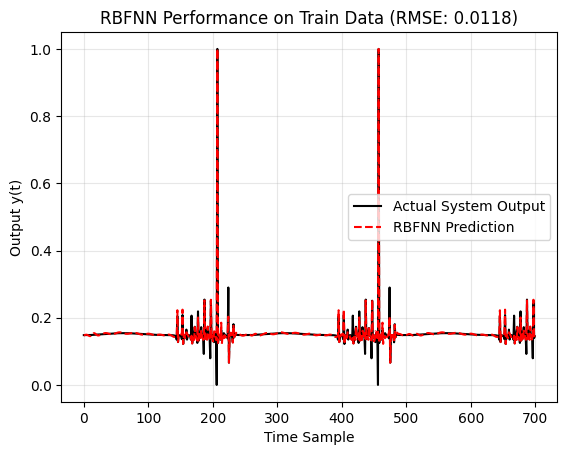

In [ ]:
limit = 700
plt.plot(y_train[:limit], label='Actual System Output', color='black', linewidth=1.5)
plt.plot(y_pred_train[:limit], label='RBFNN Prediction', color='red', linestyle='--', linewidth=1.5)

plt.title(f'RBFNN Performance on Train Data (RMSE: {rmse_train:.4f})')
plt.xlabel('Time Sample')
plt.ylabel('Output y(t)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

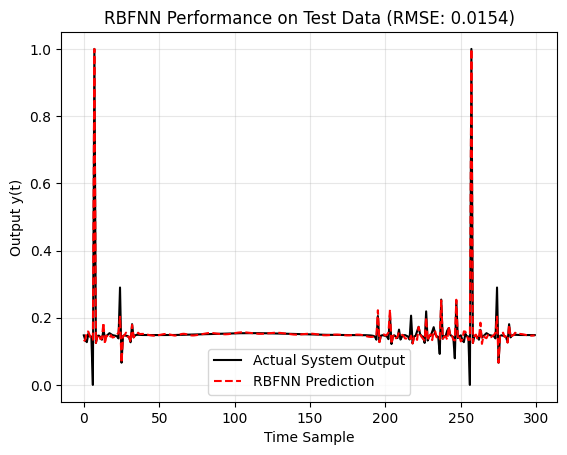

In [ ]:
limit = 300
plt.plot(y_test[:limit], label='Actual System Output', color='black', linewidth=1.5)
plt.plot(y_pred_test[:limit], label='RBFNN Prediction', color='red', linestyle='--', linewidth=1.5)

plt.title(f'RBFNN Performance on Test Data (RMSE: {rmse_test:.4f})')
plt.xlabel('Time Sample')
plt.ylabel('Output y(t)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

try various k

In [ ]:
k_list = [10, 20, 30, 40, 50, 100, 150, 200]
rmse_results = []
models_history = []

In [ ]:
for k in k_list:
    n_samples = X_train.shape[0]
    actual_k = min(k, n_samples)
    indices = np.random.choice(n_samples, actual_k, replace=False)
    centers = X_train[indices]
    sigma = sigma

    phi_train = phi_matrix(X_train, centers, sigma)
    alpha = np.linalg.pinv(phi_train).dot(y_train)
    phi_test = phi_matrix(X_test, centers, sigma)
    y_pred_test = phi_test.dot(alpha)
    y_pred_train = phi_train.dot(alpha)
    rmse_test = rmse(y_test, y_pred_test)
    rmse_train = rmse(y_train , y_pred_train)
    rmse_results.append(rmse_test)

    print(f"{actual_k} | {sigma} | {rmse_test} | {rmse_train}")


10 | 0.8328547470143473 | 0.047050031376663984 | 0.03571671716798888
20 | 0.8328547470143473 | 0.049384334324944316 | 0.03638107962701965
30 | 0.8328547470143473 | 0.02186206440038352 | 0.018363385278107675
40 | 0.8328547470143473 | 0.018025842640748774 | 0.014604579419030914
50 | 0.8328547470143473 | 0.018894821641367215 | 0.015497604160426351
100 | 0.8328547470143473 | 0.01636921097626165 | 0.013286653758441149
150 | 0.8328547470143473 | 0.016083601996830697 | 0.01292443696156376
200 | 0.8328547470143473 | 0.015282920410543145 | 0.011646562073110031


In [ ]:
best_rmse = min(rmse_results)
best_k_index = rmse_results.index(best_rmse)
best_k = k_list[best_k_index]

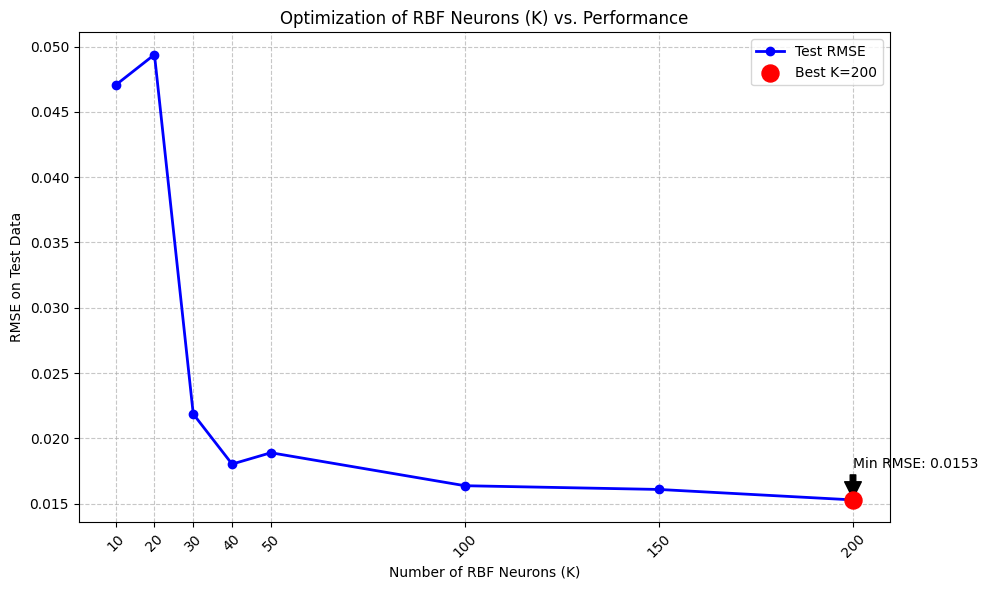

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_list, rmse_results, marker='o', linestyle='-', color='b', linewidth=2, label='Test RMSE')

plt.scatter(best_k, best_rmse, color='red', s=150, zorder=5, label=f'Best K={best_k}')
plt.annotate(f'Min RMSE: {best_rmse:.4f}',
             xy=(best_k, best_rmse),
             xytext=(best_k, best_rmse + 0.05 * max(rmse_results)),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Optimization of RBF Neurons (K) vs. Performance')
plt.xlabel('Number of RBF Neurons (K)')
plt.ylabel('RMSE on Test Data')
plt.xticks(k_list, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(42)
indices = np.random.choice(X_train.shape[0], best_k, replace=False)
fixed_centers = X_train[indices]

sigma_values = [0.5, 1, 2.5, 5, 7, 10]
rmse_results = []

In [ ]:
for sigma in sigma_values:
    phi_train = phi_matrix(X_train, fixed_centers, sigma)
    alpha = np.linalg.pinv(phi_train).dot(y_train)
    phi_test = phi_matrix(X_test, fixed_centers, sigma)
    y_pred_test = phi_test.dot(alpha)
    y_pred_train = phi_train.dot(alpha)
    rmse_test = rmse(y_test, y_pred_test)
    rmse_train = rmse(y_train, y_pred_train)
    print(f"{sigma} | {rmse_test} | {rmse_train}")
    rmse_results.append(rmse_test)

0.5 | 0.013868243747038985 | 0.010730625539615696
1 | 0.015656442921451637 | 0.012347208374454289
2.5 | 0.01778103595023957 | 0.014260578186100041
5 | 0.018471178927640806 | 0.014606478217888467
7 | 0.018646016837585166 | 0.014720791311617232
10 | 0.019367540023925413 | 0.01556114794470908


In [ ]:
min_rmse = min(rmse_results)
best_sigma_idx = rmse_results.index(min_rmse)
best_sigma = sigma_values[best_sigma_idx]

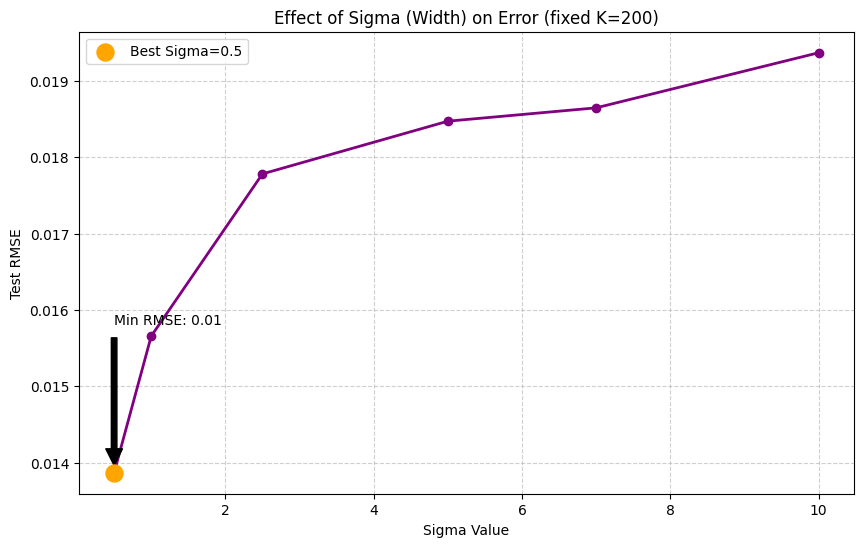

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, rmse_results, marker='o', linestyle='-', color='purple', linewidth=2)

plt.scatter(best_sigma, min_rmse, color='orange', s=150, zorder=5, label=f'Best Sigma={best_sigma}')
plt.annotate(f'Min RMSE: {min_rmse:.2f}',
             xy=(best_sigma, min_rmse),
             xytext=(best_sigma, min_rmse + 0.1 * max(rmse_results)),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title(f'Effect of Sigma (Width) on Error (fixed K={best_k})')
plt.xlabel('Sigma Value')
plt.ylabel('Test RMSE')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
k = best_k # best k
sigma = best_sigma # best
k, sigma

(200, 0.5)

In [ ]:
np.random.seed(42)
random_indices = np.random.choice(len(X_train), k , replace=False)
centers_final = X_train[random_indices]
centers_final.shape

(200, 3)

In [ ]:
phi_train_final = phi_matrix(X_train, centers_final, sigma)
phi_train_final.shape

(700, 200)

In [ ]:
alpha = np.linalg.pinv(phi_train_final).dot(y_train)
alpha.shape

(200, 1)

In [ ]:
y_pred_train_final = phi_train_final.dot(alpha)
phi_test_final = phi_matrix(X_test, centers_final, sigma)
y_pred_test_final = phi_test_final.dot(alpha)

In [ ]:
rmse_train = rmse(y_train, y_pred_train_final)
rmse_test = rmse(y_test, y_pred_test_final)

print(f"Result for Train: {rmse_train}")
print(f"Result for Test: {rmse_test}")

Result for Train: 0.010730625539615696
Result for Test: 0.013868243747038985


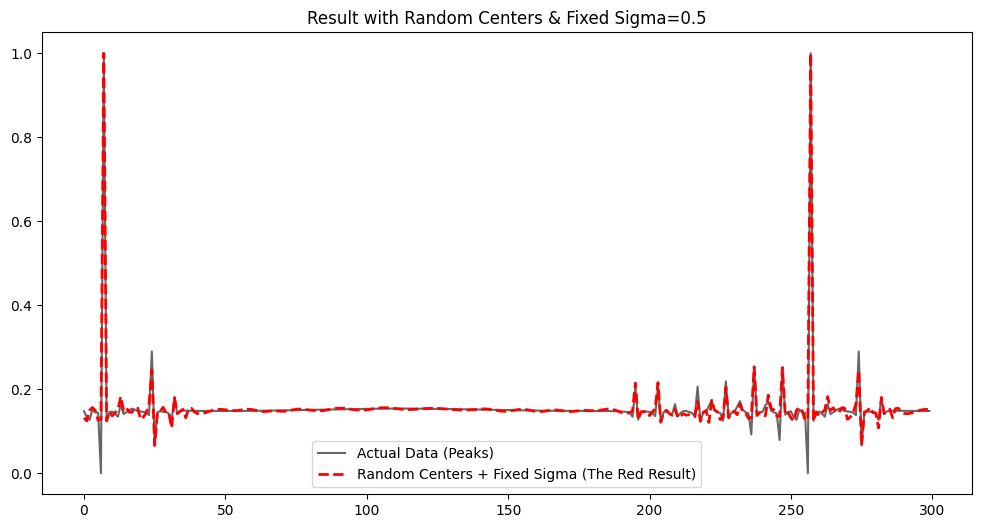

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'k-', alpha=0.6, label='Actual Data (Peaks)')
plt.plot(y_pred_test_final, 'r--', linewidth=2, label='Random Centers + Fixed Sigma (The Red Result)')
plt.title(f'Result with Random Centers & Fixed Sigma={sigma}')
plt.legend()
plt.show()

# L2

In [ ]:
def train_rbf_l2(phi_train, y_train, lam):
    k = phi_train.shape[1]
    I = np.eye(k)
    A = phi_train.T @ phi_train + lam * I  #darim: (Φᵀ Φ + λI)
    B = phi_train.T @ y_train #darim Φᵀ y
    alpha = np.linalg.solve(A, B) # inv(A) @ B

    return alpha

In [ ]:
k = 700 # hadaf ine ke ba k haye bozorg khob javab bede dige
sigma = 0.5

## without l2

In [ ]:
np.random.seed(42)
random_indices = np.random.choice(len(X_train), k , replace=False)
centers = X_train[random_indices]
centers.shape

(700, 3)

In [ ]:
phi_train_c = phi_matrix(X_train, centers, sigma)
alpha = np.linalg.pinv(phi_train_c).dot(y_train)
y_pred_train_c = phi_train_c.dot(alpha)
phi_test_c = phi_matrix(X_test, centers, sigma)
y_pred_test_c = phi_test_c.dot(alpha)

In [ ]:
rmse_train = rmse(y_train, y_pred_train_c)
rmse_test = rmse(y_test, y_pred_test_c)

print(f"Result for Train: {rmse_train}")
print(f"Result for Test: {rmse_test}")

Result for Train: 0.006960215405499155
Result for Test: 0.008988554526157296


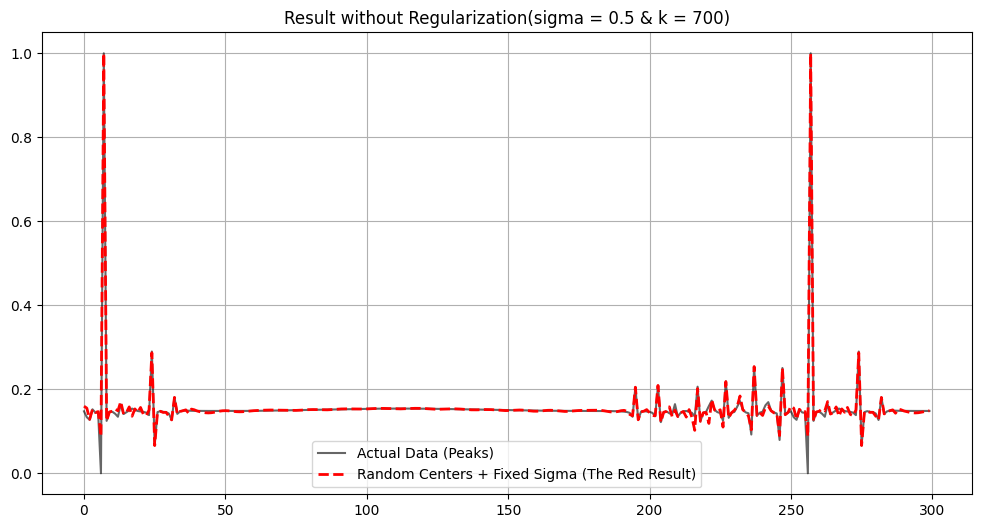

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'k-', alpha=0.6, label='Actual Data (Peaks)')
plt.plot(y_pred_test_c, 'r--', linewidth=2, label='Random Centers + Fixed Sigma (The Red Result)')
plt.title(f'Result without Regularization(sigma = {sigma} & k = {k})')
plt.legend()
plt.grid(True)
plt.show()

## with l2

In [ ]:
L = 0.1

In [ ]:
alpha = train_rbf_l2(phi_train_c,y_train,L)
y_pred_train_c = phi_train_c.dot(alpha)
phi_test_c = phi_matrix(X_test, centers,sigma)
y_pred_test_c = phi_test_c.dot(alpha)

In [ ]:
rmse_train = rmse(y_train, y_pred_train_c)
rmse_test = rmse(y_test, y_pred_test_c)
print(f"Result for Train: {rmse_train}")
print(f"Result for Test: {rmse_test}")

Result for Train: 0.025980173143522925
Result for Test: 0.034615997374857314


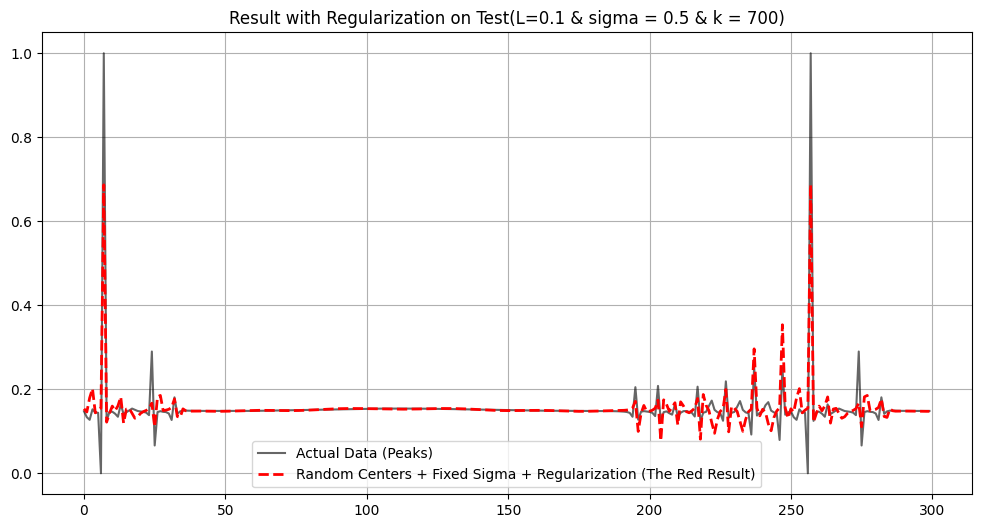

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'k-', alpha=0.6, label='Actual Data (Peaks)')
plt.plot(y_pred_test_c, 'r--', linewidth=2, label='Random Centers + Fixed Sigma + Regularization (The Red Result)')
plt.title(f'Result with Regularization on Test(L={L} & sigma = {sigma} & k = {k})')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lambda_values = [0.001, 0.01, 0.1, 1, 10]

rmse_train_list = []
rmse_test_list = []


phi_train = phi_matrix(X_train, centers, sigma)
phi_test = phi_matrix(X_test, centers, sigma)

for lam in lambda_values:


    alpha = train_rbf_l2(phi_train, y_train, lam)


    y_train_pred = phi_train @ alpha
    y_test_pred = phi_test @ alpha


    rmse_train = rmse(y_train, y_train_pred)
    rmse_test = rmse(y_test, y_test_pred)

    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)

    print(f"λ = {lam} | RMSE_train = {rmse_train:.4f} | RMSE_test = {rmse_test:.4f}")


λ = 0.001 | RMSE_train = 0.0163 | RMSE_test = 0.0200
λ = 0.01 | RMSE_train = 0.0194 | RMSE_test = 0.0243
λ = 0.1 | RMSE_train = 0.0260 | RMSE_test = 0.0346
λ = 1 | RMSE_train = 0.0368 | RMSE_test = 0.0525
λ = 10 | RMSE_train = 0.0457 | RMSE_test = 0.0671


In [ ]:
min_rmse = min(rmse_test_list)
best_L_idx = rmse_test_list.index(min_rmse)
best_L = lambda_values[best_L_idx]

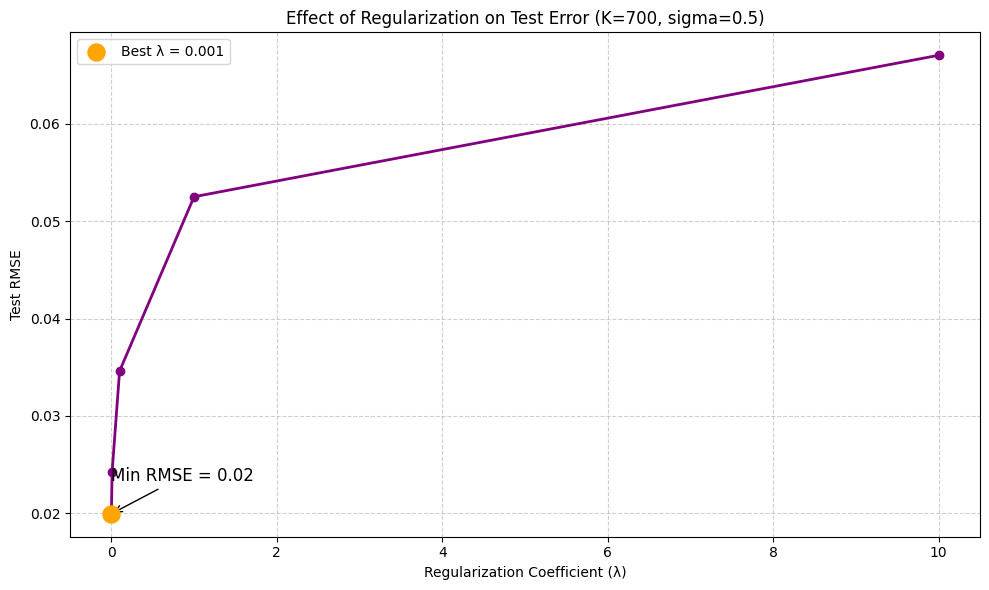

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, rmse_test_list, marker='o', linestyle='-', color='purple', linewidth=2)
plt.scatter(best_L, min_rmse, color='orange', s=150, zorder=5, label=f'Best λ = {best_L}')
plt.annotate(
    f"Min RMSE = {min_rmse:.2f}",
    xy=(best_L, min_rmse),
    xytext=(best_L * 1.2, min_rmse + 0.05 * max(rmse_test_list)),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=12
)

plt.title(f'Effect of Regularization on Test Error (K={k}, sigma={sigma})')
plt.xlabel('Regularization Coefficient (λ)')
plt.ylabel('Test RMSE')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# Kmeans

In [ ]:
import numpy as np

def kmeans_plus_plus_init(X, k, random_state=42):
    np.random.seed(random_state)
    n_samples = X.shape[0]

    first_idx = np.random.choice(n_samples)
    centroids = [X[first_idx]]

    #  remaining k-1 centroids
    for _ in range(1, k):
        # distances to the nearest chosen centroid
        distances = np.array([
            min(np.linalg.norm(x - c)**2 for c in centroids)
            for x in X
        ])


        probs = distances / distances.sum()

        # next centroid
        next_idx = np.random.choice(n_samples, p=probs)
        centroids.append(X[next_idx])

    return np.array(centroids)


In [ ]:
def KMeans (X, k , max_iter = 100, tol = 1e-4):
    '''
    tol smaller = alg zood stop mishe, speed bala, deghat kam
    tol bozorgtar = alg sakht migire, time bishtari migire, deghat ziyad, ta vaghti edami mide ke center ha kamel fix beshan
    '''
    n_samples, n_features = X.shape
    np.random.seed(42)
    '''random_indices = np.random.choice(n_samples, k , replace = False)
    centroids = X[random_indices]'''
    centroids = kmeans_plus_plus_init(X, k)

    for i in range(max_iter):
        old_centroids = centroids.copy()
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis = 2)
        # X shape: (N, 1, D) | Centroids shape: (1, K, D) -> Dist shape: (N, K)
        # distance hame noghat to center ha mohasebe shodan

        cluster_labels = np.argmin(distances, axis = 1)
        # index nazdiktarin center baraye har dade ro peyda konim
        new_centroids = np.zeros((k, n_features))
        for cluster_index in range(k):
            cluster_points = X[cluster_labels == cluster_index ]
            if len(cluster_points) > 0:
                new_centroids[cluster_index] = cluster_points.mean(axis = 0)
            else:
                new_centroids[cluster_index] = old_centroids[cluster_index]

        centroids = new_centroids

        shift = np.linalg.norm(centroids - old_centroids)
        if shift < tol:
            print(f"K-Means converged at iteration {i}")
            break
    return centroids



K-Means converged at iteration 5
10 | 1.2923699512374591 | 0.05726544637977595 | 0.040215290239696326
K-Means converged at iteration 6
20 | 1.0426049634478782 | 0.02290459889777694 | 0.018968454426305462
K-Means converged at iteration 4
30 | 0.9638175748306979 | 0.018479762797385627 | 0.015109533378511572
K-Means converged at iteration 4
40 | 0.9083346266495169 | 0.01770602738950625 | 0.014296087678879445
K-Means converged at iteration 4
50 | 0.8833895590841012 | 0.016941774290500377 | 0.013706808088290078
K-Means converged at iteration 2
100 | 0.8064545161097252 | 0.014968979883198622 | 0.011432736312711168
K-Means converged at iteration 2
150 | 0.7965168566729466 | 0.014124253224053895 | 0.010861987984709668
K-Means converged at iteration 2
200 | 0.8379196034125181 | 0.014295950806403961 | 0.010837743365333604


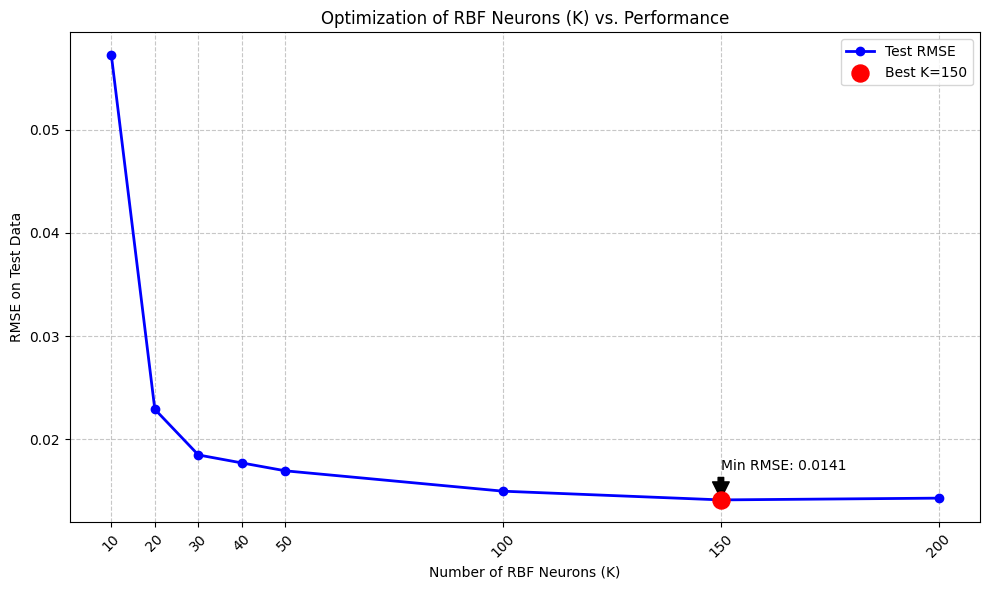

In [ ]:
k_list = [10, 20, 30, 40, 50, 100, 150, 200]
rmse_results = []
models_history = []

for k in k_list:
    n_samples = X_train.shape[0]
    actual_k = min(k, n_samples)
    centers = KMeans(X_train, k)
    sigma = sigma_(centers)

    phi_train = phi_matrix(X_train, centers, sigma)
    alpha = np.linalg.pinv(phi_train).dot(y_train)
    phi_test = phi_matrix(X_test, centers, sigma)
    y_pred_test = phi_test.dot(alpha)
    y_pred_train = phi_train.dot(alpha)
    rmse_test = rmse(y_test, y_pred_test)
    rmse_train = rmse(y_train , y_pred_train)
    rmse_results.append(rmse_test)

    print(f"{actual_k} | {sigma} | {rmse_test} | {rmse_train}")

best_rmse = min(rmse_results)
best_k_index = rmse_results.index(best_rmse)
best_k = k_list[best_k_index]
plt.figure(figsize=(10, 6))
plt.plot(k_list, rmse_results, marker='o', linestyle='-', color='b', linewidth=2, label='Test RMSE')

plt.scatter(best_k, best_rmse, color='red', s=150, zorder=5, label=f'Best K={best_k}')
plt.annotate(f'Min RMSE: {best_rmse:.4f}',
             xy=(best_k, best_rmse),
             xytext=(best_k, best_rmse + 0.05 * max(rmse_results)),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Optimization of RBF Neurons (K) vs. Performance')
plt.xlabel('Number of RBF Neurons (K)')
plt.ylabel('RMSE on Test Data')
plt.xticks(k_list, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
k = best_k
kmeans_centers = KMeans(X_train, k)

K-Means converged at iteration 2


0.5 | 0.00930164406991945 | 0.0070320890925147945
1 | 0.014856774332816796 | 0.011336133360322524
2.5 | 0.01717075086915333 | 0.01362060118395568
5 | 0.018397865322470734 | 0.014535418075107885
7 | 0.018687089998828888 | 0.014736587762437043
10 | 0.018813118260311706 | 0.01480464083502848


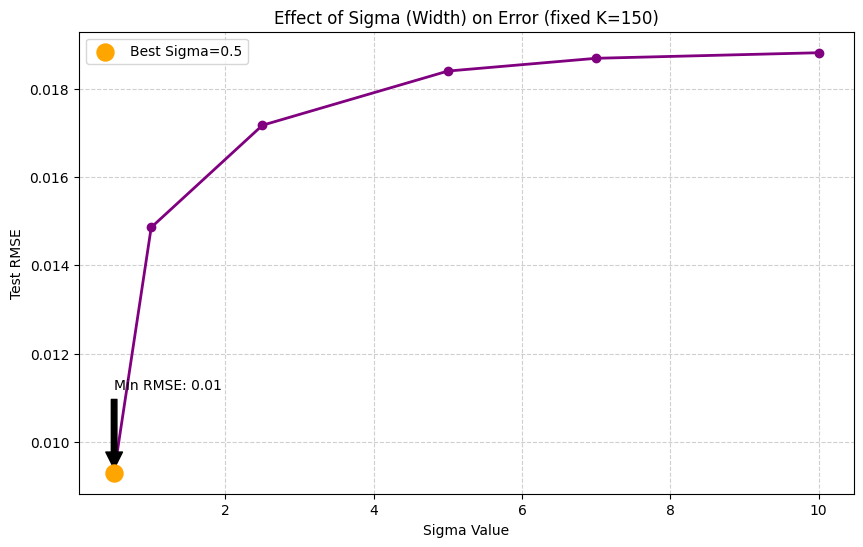

In [ ]:
np.random.seed(42)
fixed_centers = kmeans_centers

sigma_values = [0.5, 1, 2.5, 5, 7, 10]
rmse_results = []
for sigma in sigma_values:
    phi_train = phi_matrix(X_train, fixed_centers, sigma)
    alpha = np.linalg.pinv(phi_train).dot(y_train)
    phi_test = phi_matrix(X_test, fixed_centers, sigma)
    y_pred_test = phi_test.dot(alpha)
    y_pred_train = phi_train.dot(alpha)
    rmse_test = rmse(y_test, y_pred_test)
    rmse_train = rmse(y_train, y_pred_train)
    print(f"{sigma} | {rmse_test} | {rmse_train}")
    rmse_results.append(rmse_test)
min_rmse = min(rmse_results)
best_sigma_idx = rmse_results.index(min_rmse)
best_sigma = sigma_values[best_sigma_idx]
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, rmse_results, marker='o', linestyle='-', color='purple', linewidth=2)

plt.scatter(best_sigma, min_rmse, color='orange', s=150, zorder=5, label=f'Best Sigma={best_sigma}')
plt.annotate(f'Min RMSE: {min_rmse:.2f}',
             xy=(best_sigma, min_rmse),
             xytext=(best_sigma, min_rmse + 0.1 * max(rmse_results)),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title(f'Effect of Sigma (Width) on Error (fixed K={best_k})')
plt.xlabel('Sigma Value')
plt.ylabel('Test RMSE')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
kmeans_centers.shape

(150, 3)

In [ ]:
sigma = best_sigma
sigma

0.5

In [ ]:
phi_train_k = phi_matrix(X_train, kmeans_centers, sigma)
phi_train_k.shape

(700, 150)

In [ ]:
alpha = np.linalg.pinv(phi_train_k).dot(y_train)
alpha.shape

(150, 1)

In [ ]:
y_pred_train_k = phi_train_k.dot(alpha)
phi_test_k = phi_matrix(X_test, kmeans_centers, sigma)
y_pred_test_k = phi_test_k.dot(alpha)

In [ ]:
rmse_train = rmse(y_train, y_pred_train_k)
rmse_test = rmse(y_test, y_pred_test_k)

print(f"Result for Train: {rmse_train}")
print(f"Result for Test: {rmse_test}")

Result for Train: 0.0070320890925147945
Result for Test: 0.00930164406991945


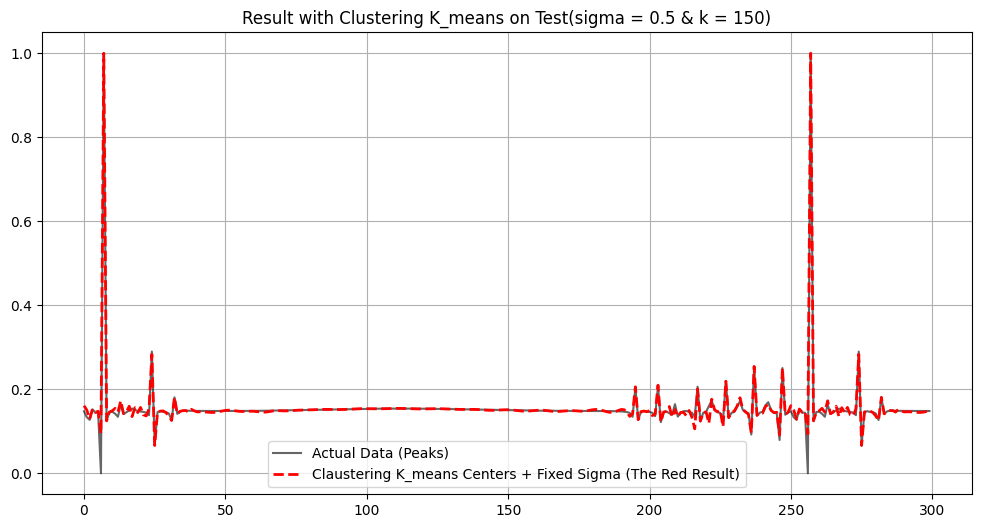

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'k-', alpha=0.6, label='Actual Data (Peaks)')
plt.plot(y_pred_test_k, 'r--', linewidth=2, label='Claustering K_means Centers + Fixed Sigma (The Red Result)')
plt.title(f'Result with Clustering K_means on Test(sigma = {sigma} & k = {k})')
plt.legend()
plt.grid(True)
plt.show()

## Nearest Neighbor


In [26]:
def adaptive_sigma(centers, p = 2):
    '''
    data moterakem bahse va center ha be ham nazdic bashan sigma kam mishe , deghat mire bala
    data parakande bashe va center ha fasele dashte bashan sigma bozorg mishe to generalization save beshe

    '''
    k_ = centers.shape[0]
    sigmas = np.zeros(k_)

    for i in range (k_):
        diff = centers - centers[i]
        distances = np.sqrt(np.sum(diff**2, axis=1))

        sorted_indices = np.argsort(distances)
        sorted_distances = distances[sorted_indices]

        nearest_neighbor = sorted_distances[1 : p + 1] # index 0 mishe khodesh
        if len(nearest_neighbor) > 0 :
            sigmas[i] = np.mean(nearest_neighbor)
        else:
            sigmas[i] = 1 # in case we have just 1 center

    return sigmas

In [28]:
def phi_matrix_variable_sigma(X, centers, sigmas):
    n = X.shape[0]
    k_ = centers.shape[0]
    phi = np.zeros((n, k_))

    for i in range(n):
        for j in range(k_):
            diff = X[i] - centers[j]
            phi[i, j] = np.exp(-(np.sum(diff**2)) / (sigmas[j]**2))

    return phi

In [ ]:
sigmas = adaptive_sigma(kmeans_centers, p=2)

phi_train = phi_matrix_variable_sigma(X_train, kmeans_centers, sigmas)

phi_test  = phi_matrix_variable_sigma(X_test,  kmeans_centers, sigmas)

alpha = np.linalg.pinv(phi_train).dot(y_train)

y_train_pred = phi_train.dot(alpha)

y_test_pred  = phi_test.dot(alpha)


rmse_train = rmse(y_train, y_train_pred)
rmse_test  = rmse(y_test, y_test_pred)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)


Train RMSE: 0.006756732577733339
Test RMSE: 0.008736484743185073


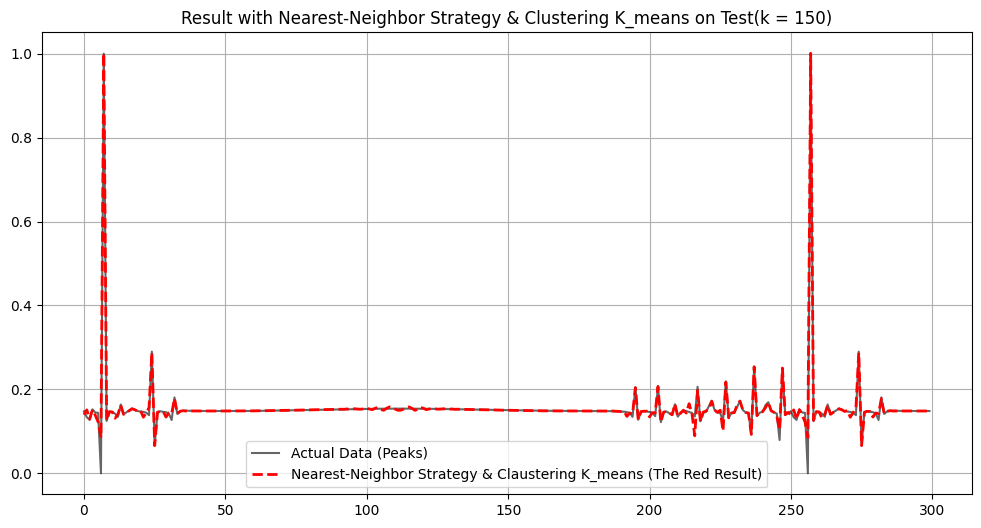

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'k-', alpha=0.6, label='Actual Data (Peaks)')
plt.plot(y_test_pred, 'r--', linewidth=2, label='Nearest-Neighbor Strategy & Claustering K_means (The Red Result)')
plt.title(f'Result with Nearest-Neighbor Strategy & Clustering K_means on Test(k = {k})')
plt.legend()
plt.grid(True)
plt.show()

Claustering kmeans with sklearn library

In [31]:
from sklearn.cluster import KMeans
import numpy as np

k = 200


kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)

centers = kmeans.cluster_centers_


print(centers.shape)

(200, 3)


In [32]:
sigma = 0.5

In [33]:
phi_train_k = phi_matrix(X_train, centers, sigma)
phi_train_k.shape

(700, 200)

In [34]:
alpha = np.linalg.pinv(phi_train_k).dot(y_train)
alpha.shape

(200, 1)

In [35]:
y_pred_train_k = phi_train_k.dot(alpha)
phi_test_k = phi_matrix(X_test, centers, sigma)
y_pred_test_k = phi_test_k.dot(alpha)

In [36]:
rmse_train = rmse(y_train, y_pred_train_k)
rmse_test = rmse(y_test, y_pred_test_k)

print(f"Result for Train: {rmse_train}")
print(f"Result for Test: {rmse_test}")

Result for Train: 0.0070110763718428965
Result for Test: 0.009160098255812849


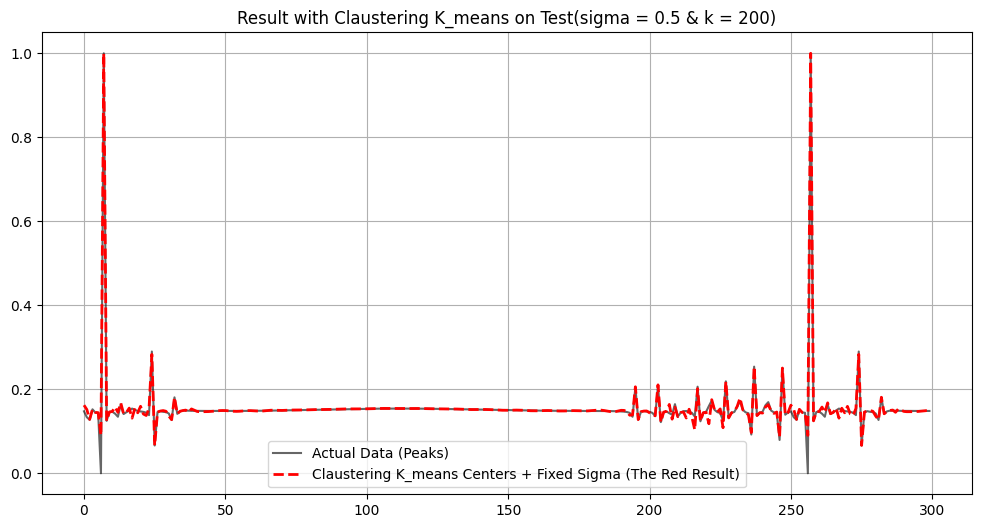

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'k-', alpha=0.6, label='Actual Data (Peaks)')
plt.plot(y_pred_test_k, 'r--', linewidth=2, label='Claustering K_means Centers + Fixed Sigma (The Red Result)')
plt.title(f'Result with Claustering K_means on Test(sigma = {sigma} & k = {k})')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
sigmas = adaptive_sigma(centers, p=2)


phi_train = phi_matrix_variable_sigma(X_train, centers, sigmas)
phi_test  = phi_matrix_variable_sigma(X_test,  centers, sigmas)


alpha = np.linalg.pinv(phi_train).dot(y_train)


y_train_pred = phi_train.dot(alpha)
y_test_pred  = phi_test.dot(alpha)


rmse_train = rmse(y_train, y_train_pred)
rmse_test  = rmse(y_test, y_test_pred)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 0.0005480327488016946
Test RMSE: 0.00048613151684708466


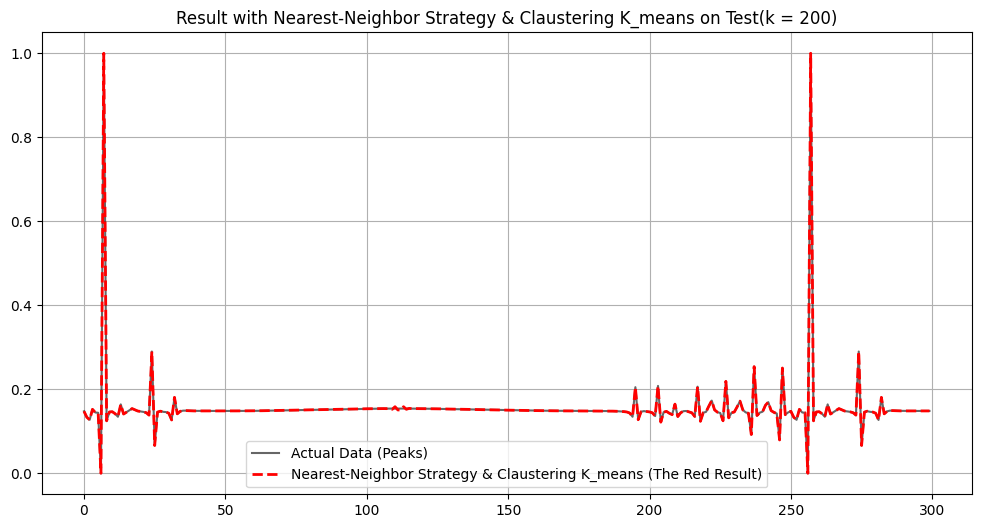

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'k-', alpha=0.6, label='Actual Data (Peaks)')
plt.plot(y_test_pred, 'r--', linewidth=2, label='Nearest-Neighbor Strategy & Claustering K_means (The Red Result)')
plt.title(f'Result with Nearest-Neighbor Strategy & Claustering K_means on Test(k = {k})')
plt.legend()
plt.grid(True)
plt.show()